In [6]:
from numpy.core.multiarray import concatenate
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix ,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,KFold
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer ,SimpleImputer,IterativeImputer
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV

In [18]:
#function to scale the data
def scalealldata(xtrain):
  scalar = StandardScaler()
  scalar.fit_transform(xtrain)
  return xtrain

#pass in the model and the training and test to get the cross validations scores
def Kfold_checkMetrics(clModel, x,y,):
  all_scores_mean = []
  all_scores_std = []
  all_scores = []
  kf = StratifiedKFold(n_splits = 2)
  for train,test in kf.split(x,y):
    #print("TRAIN:", train, "TEST:", test)
    X_train, X_test, y_train, y_test = x[train], x[test], y[train], y[test]
    #y = np.reshape(len(y),)
    clModel.fit(x,y)
    clModel.score(X_test, y_test)
    scores = cross_val_score(clModel, X_train, y_train, cv=10)
    all_scores_mean.append(scores.mean())
    all_scores_std.append(scores.std())
    all_scores.append(scores)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))  
    #print(all_scores)  
  return all_scores


#DRAW GRPAHS
def getMinMaxMean(training,labels,tle):
  models = list()
  logR = LogisticRegression()
  Percep = Perceptron()
  supportvms =svm.SVC()
  RF =RandomForestClassifier()
  MLP =  MLPClassifier()
  models = [logR,Percep,supportvms,RF,MLP]
  mean = []
  max = []
  min = []
  all= []
  for i in models:
    mean.append(np.mean(Kfold_checkMetrics(i,training,labels)))
    max.append(np.max(Kfold_checkMetrics(i,training,labels)))
    min.append(np.min(Kfold_checkMetrics(i,training,labels)))


  all.append(min)
  all.append(mean)
  all.append(max)
  df =pd.DataFrame(data =  all,index = ['Min','Mean','Max'], columns = ["Logistic Regression","Single Perceptron","SVM","Random Forest","Multi-layer Perceptron"])

  print(df)
  bar = df.plot.bar(rot=0,figsize = (12,6),title = tle)

def getMinMaxMean(Model,Modelname,training,labels,tle):
  mean = 0
  max = 0
  min = 0
  val = []
  mean = np.mean(Kfold_checkMetrics(Model,training,labels))
  max = np.max(Kfold_checkMetrics(Model,training,labels))
  min = np.min(Kfold_checkMetrics(Model,training,labels))

 
  
  df = pd.DataFrame()
  return mean, min, max



In [12]:
#load in training data
training1 = pd.read_csv('training1.csv')
training2 = pd.read_csv('training2.csv')

#sement training data 
seg_training1, seg_training2 = training1.iloc[500:1000,:-2].values, training2.iloc[500:1000,:-2].values
seg_labes1,seg_labels2 = training1.iloc[500:1000,-2:-1].values, training2.iloc[500:1000,-2:-1].values
all_training1, all_training2  =  training1.iloc[:,:-2].values, training2.iloc[:,:-2].values
#trainging data for CNN and GIST
training1_CNN = training1.iloc[:,:-512].values
training1_GIST = training1.iloc[:,-512:-2].values
#get confidence values and Labels
confidence1, labels1 = training1.iloc[:, -1:].values,training1.iloc[:, -2:-1].values
confidence2, labels2 = training2.iloc[:, -1:].values,training2.iloc[:, -2:-1].values
#Get trining data scaled
training1scaled = scalealldata(training1.iloc[:,:-2])
training2scaled = scalealldata(training2.iloc[:,:-2])



In [ ]:

iter_imp = IterativeImputer(max_iter=1, random_state=0)
iter_imp.fit(train1_data)
trans_2 = iter_imp.transform(all_training2)


In [14]:




imputerknn10 = KNNImputer(n_neighbors=10, weights="uniform",missing_values=np.nan)
imputerknn10.fit(training1scaled)
knnImputed = imputerknn10.transform(all_training2)

In [16]:
simp_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
simp_imp.fit(training1scaled)
univarInputed = simp_imp.transform(all_training2)


In [ ]:
getMinMaxMean(all_training1,labels1,"Min,Mean & Max - Unscaled")

In [ ]:
getMinMaxMean(training1scaled,labels1,"Min,Mean & Max - Scaled")

In [ ]:
getMinMaxMean(RF, "RandomForest",training1_CNN,labels1,"Min,Mean & Max -  CNN Only")

In [ ]:
RF = RandomForestClassifier()
getMinMaxMean(RF, "RandomForest",training1_GIST,labels1,"Min,Mean & Max -  GIST Only")

In [ ]:
print(all)

x =[i for i in all[0]]
y =[i for i in all[1]]
x.extend(y)
print(x)
df =pd.DataFrame(data =  all,index = ['Scaled ','Unscaled'], columns = ['Min','Mean','Max'])

print(df)
bar = df.plot.bar(rot=0,figsize = (12,6),title = "Min,Mean & Max of Random Forrest with Different Feautures")

#Hyper Parameter testing

In [ ]:

#hyperparam testing
param_grid = {'n_estimators': [50, 100, 250,500],
              'criterion': ['gini', 'entropy'],
              'max_features':['sqrt', 'log2', None],
              'class_weight':['balanced', 'balanced_subsample',None]}



base_estimator = RandomForestClassifier(random_state=0)

sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2,max_resources='auto').fit(all_training1, labels1)
                         

frame =pd.DataFrame(sh.cv_results_)

#print(frame)
#bar = df.plot(frame,rot=0,figsize = (12,6),title = "Hyperparameter testing")

sh.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt', n_estimators=50, random_state=0)

#Single Layer Perceptron

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(seg_training1, seg_labes1, test_size=0.4)
clf = Perceptron()


clf.fit(X_train,y_train) 
pred_class = clf.predict(X_test) # Prediction after learning


print(f'Process completed in {clf.n_iter_} epochs')
print(f'Classification accuracy = {(accuracy_score(y_test, pred_class, normalize=False)/50)}')
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_class)) # Confusion matrix




#Multi Layered Perceptron

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Process completed in 42 epochs
Classification accuracy = 0.6


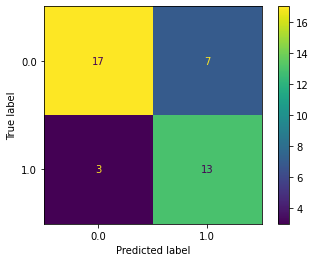

In [76]:
X_train, X_test, y_train, y_test = train_test_split(seg_training1, seg_labes1, test_size=0.4)
clf = MLPClassifier()


clf.fit(X_train,y_train) 
pred_class = clf.predict(X_test) # Prediction after learning


print(f'Process completed in {clf.n_iter_} epochs')
print(f'Classification accuracy = {(accuracy_score(y_test, pred_class, normalize=False)/50)}')
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_class)) # Confusion matrix

#Support Vector Machines

Classification accuracy = 0.725


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


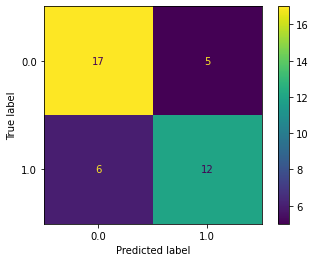

In [174]:
#initiate the classifier
clf = svm.SVC()
#train test split
X_train, X_test, y_train, y_test = train_test_split(seg_training1, seg_labes1, test_size=0.4)



clf.fit(X_train,y_train) 
pred_class = clf.predict(X_test) # Prediction after learning


#print(f'Process completed in {clf.n_iter_} epochs')
print(f'Classification accuracy = {(accuracy_score(y_test, pred_class, normalize=False)/len(pred_class))}')
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_class)) # Confusion matrix

#Random Forests

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
Classification accuracy = 0.75


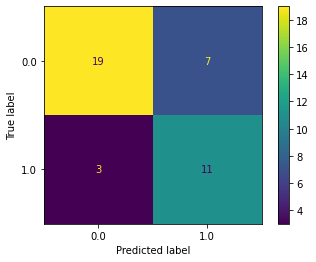

In [213]:
#initiate classifier
rf =  RandomForestClassifier()
#train test split
X_train, X_test, y_train, y_test = train_test_split(seg_training1, seg_labes1, test_size=0.4)


#fit the training data
rf.fit(X_train,y_train) 
pred_class = rf.predict(X_test) # Prediction after learning
print(pred_class)
y = [int(i[0]) for i in y_test]
print(y)
#print(f'Process completed in {clf.n_iter_} epochs')
print(f'Classification accuracy = {(accuracy_score(y_test, pred_class, normalize=False)/len(pred_class))}')
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_class)) # Confusion matrix

#Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Process completed in [52] epochs
Classification accuracy = 0.825


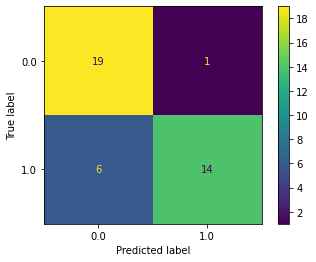

In [99]:
#initiate the classifier
clf = LogisticRegression(random_state = 0)
#train test split
X_train, X_test, y_train, y_test = train_test_split(seg_training1, seg_labes1, test_size=0.4)


#fit the training data
clf.fit(X_train,y_train) 
#class prediction
pred_class = clf.predict(X_test) # Prediction after learning

#get the iterations and classification accuracy
print(f'Process completed in {clf.n_iter_} epochs')
print(f'Classification accuracy = {(accuracy_score(y_test, pred_class, normalize=False)/len(pred_class))}')
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_class)) # Confusion matrix


In [ ]:
#train test split of 40%
X_train, X_test, y_train, y_test = train_test_split(t1, l1, test_size=0.4, random_state=0)

#cross validate score the classifier
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

#Final Classifier (Hyperparmeter tested Random Forest Classifier)

In [76]:
import csv
#load in test data scale the training data 
test = pd.read_csv('test.csv')
data = scalealldata(all_training1)
#impute the missing values for the test data
simp_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
simp_imp.fit(training1scaled)

univarInputed = simp_imp.transform(test)
confidence1=confidence1.flatten()
#initiate the classifer
final_clf = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt', n_estimators=50, random_state=0)
final_clf.fit(data,labels1,confidence1)
#predict the data
preds=final_clf.predict(univarInputed)

d = pd.DataFrame(preds,columns=["predictions"])
d.to_csv('predictions.csv')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
